
# Project: Investigate a tmdb-movies Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> I Will Investigate a data set contains information of movies that contains rating for each movie and it`s revenue 
>
> questions that i will try to answer:
>
> 1 - what is the film that achive maximum revenue and who is it`s director and it`s release yesr
>
> 2 - what is the most popular film and who is it`s director and it`s release year
>
> 3 - what is the film that take maximum vote and who is it`s director and it`s release year
>
> 4 - is film budget has an impact on number of votes from people(i want to chek when i make my budget higher i get more votes)
>
> 5 - is film budget has an impact on revenue (i want to chek when i make my budget higher i get revenue)


In [1]:
#importing required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

>importing my dataset and clean it

### General Properties

In [2]:
#get dataset into python
movies_dataset=pd.read_csv('tmdb-movies.csv')

In [3]:
movies_dataset.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,174799923.1,1.385749e+09


In [4]:
movies_dataset.shape

(10866, 21)

In [5]:
movies_dataset.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

### dropping columns that i won`t use in my investigation
> as i will use budget_adj and revenue_adj so no need for budget, revenue

In [6]:
movies_dataset.drop(['id','imdb_id','cast','homepage','tagline','keywords','overview','genres','production_companies','release_date','budget','revenue'],axis=1,inplace=True)

In [7]:
movies_dataset.columns

Index(['popularity', 'original_title', 'director', 'runtime', 'vote_count',
       'vote_average', 'release_year', 'budget_adj', 'revenue_adj'],
      dtype='object')

In [8]:
movies_dataset.shape

(10866, 9)

### check for null values and clean it 

In [9]:
movies_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 9 columns):
popularity        10866 non-null float64
original_title    10866 non-null object
director          10822 non-null object
runtime           10866 non-null int64
vote_count        10866 non-null int64
vote_average      10866 non-null float64
release_year      10866 non-null int64
budget_adj        10866 non-null float64
revenue_adj       10866 non-null float64
dtypes: float64(4), int64(3), object(2)
memory usage: 764.1+ KB


In [10]:
movies_dataset.director.fillna('unknown',inplace=True)
movies_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 9 columns):
popularity        10866 non-null float64
original_title    10866 non-null object
director          10866 non-null object
runtime           10866 non-null int64
vote_count        10866 non-null int64
vote_average      10866 non-null float64
release_year      10866 non-null int64
budget_adj        10866 non-null float64
revenue_adj       10866 non-null float64
dtypes: float64(4), int64(3), object(2)
memory usage: 764.1+ KB


In [11]:
movies_dataset.head()

,popularity,original_title,director,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,Colin Trevorrow,124,5562,6.5,2015,137999939.3,1.392446e+09
1,28.419936,Mad Max: Fury Road,George Miller,120,6185,7.1,2015,137999939.3,3.481613e+08
2,13.112507,Insurgent,Robert Schwentke,119,2480,6.3,2015,101199955.5,2.716190e+08
3,11.173104,Star Wars: The Force Awakens,J.J. Abrams,136,5292,7.5,2015,183999919.0,1.902723e+09
4,9.335014,Furious 7,James Wan,137,2947,7.3,2015,174799923.1,1.385749e+09


<a id='eda'></a>
## Exploratory Data Analysis

> we start answering our questions 

In [12]:
# find the film that have maximum (parameter_name)
def find(parameter_name):
    return(movies_dataset[parameter_name==parameter_name.max()])


### what is the film that achive maximum revenue and who is it`s director and it`s release yesr

In [13]:
find(movies_dataset.revenue_adj)

,popularity,original_title,director,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
1386,9.432768,Avatar,James Cameron,162,8458,7.1,2009,240886902.9,2.827124e+09


> this mean that avatar is the film that had achive maximum revinue 
>
>the director of avatar is James Cameron this movie was released in 2009

### what is the most popular film and who is it`s director and it`s release yesr

In [14]:
find(movies_dataset.popularity)

,popularity,original_title,director,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,Colin Trevorrow,124,5562,6.5,2015,137999939.3,1.392446e+09


> Jurassic World is the most popular film 
>
>colin trevorrow is the director of this film that is released in 2015

### what is the film that take maximum vote and who is it`s director and it`s release year

In [15]:
find(movies_dataset.vote_count)

,popularity,original_title,director,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
1919,9.363643,Inception,Christopher Nolan,148,9767,7.9,2010,160000000.0,825500000.0


>Inception is the film that had got maximum votes
>
>Christopher Nolan  is the director of this film that is released in 2010

## doing heat map correlation matrix to get some insights

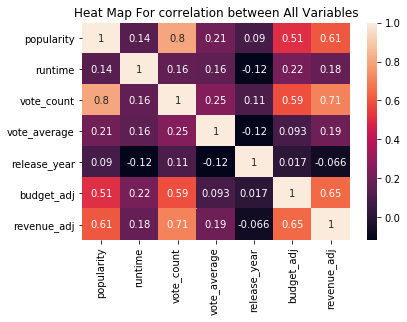

In [17]:
corrMatrix = movies_dataset.corr()
sns.heatmap(corrMatrix, annot=True)
plt.title("Heat Map For correlation between All Variables") 
plt.show()

>The most important variable for me is revenue
>
>from the heat map it seems that popularity, number of votes and budget have a high correlation with revenuethis mean if i want to make a film and i wont a high revenue then i should make a film like films that had achived high votes or popularity and use high budget this make my film bring high revenue by high probability 

### is film budget has an impact on number of votes from people(i want to chek when i make my budget higher i get more votes)

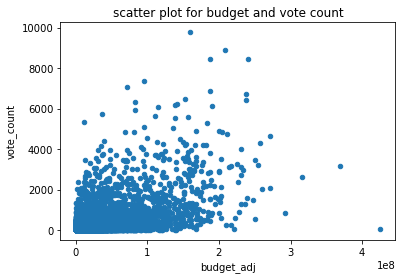

In [19]:
corr_budget_vote = movies_dataset.plot.scatter(x='budget_adj', y='vote_count',title="scatter plot for budget and vote count")

> there is a positive correlation between the two variables (0.59)
>
>this means that when i invest more mone i get more votes to my film

### is film budget has an impact on revenue (i want to chek when i make my budget higher i get revenue)

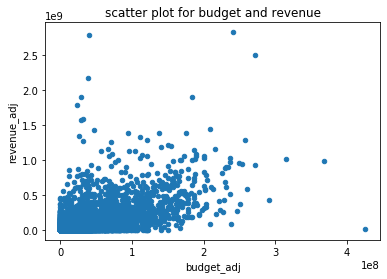

In [20]:
corr_budget_vote = movies_dataset.plot.scatter(x='budget_adj', y='revenue_adj',title='scatter plot for budget and revenue')

> there is a positive correlation between the two variables (0.65)
>
>this means that when i invest more mone i get more revenue to my film

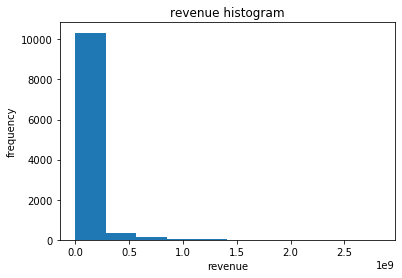

In [58]:
fig, ax = plt.subplots() 
ax.hist(movies_dataset["revenue_adj"])
plt.xlabel("revenue") 
plt.ylabel("frequency") 
plt.title('revenue histogram') 
plt.show() 

In [59]:
# look at summary statistics of revenue columns
movies_dataset.revenue_adj.describe()

count    1.086600e+04
mean     5.136436e+07
std      1.446325e+08
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      3.369710e+07
max      2.827124e+09
Name: revenue_adj, dtype: float64

In [60]:
#count number of films that havn`t revenue (revenue column = 0)
(movies_dataset.revenue_adj==0).sum()

6016

> after i sow the histogram and some summary statistics for revenue column it`s obviously that 55.4 % of the data have no revenue 
>
>i think this is from data entry error because not logical 

<a id='conclusions'></a>
## Conclusions
> avatar film  had achive the highest revinue the director of this film is James Cameron this movie was released in 2009
>
>Jurassic World film is the most popular the director of this film is colin trevorrow this movie was released in 2015
>
>Inception film was the film that had got maximum votes, Christopher Nolan is the director of this film that is released in 2010
>
>popularity, number of votes and budget have a high correlation with revenue
>
>when i invest more money i get more votes to my film
>
>

### limitations
> 55.4 % of the data have no revenue 